In [9]:
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
avg = pd.read_csv("average_monthly_bill.csv")
print(avg.head())


   State            City   average monthly electricity bill ($)
0  Texas           Dallas                                 184.0
1  Texas          Houston                                 168.0
2  Texas      San Antonio                                 189.0
3  Texas  Chorpus Christi                                 178.0
4  Texas          Lubbock                                 197.0


In [11]:
states = ["Texas", "Oklahoma", "New Mexico"]
avg_states_tex = []
avg_states_okla = []
avg_states_NM = []

In [16]:
# Create empty list to fill with tumor vol data (for plotting)
for i in range(len(avg)-1):
    if avg.loc[i, "State"] == "Texas":
        avg_states_tex.append(avg.loc[i, "average monthly electricity bill ($)"])
    if avg.loc[i, "State"] == "Oklahoma":
        avg_states_okla.append(avg.loc[i, "average monthly electricity bill ($)"])
    if avg.loc[i, "State"] == "New Mexico":
        avg_states_NM.append(avg.loc[i, "average monthly electricity bill ($)"])
average_States = [avg_states_tex, avg_states_okla, avg_states_NM]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(average_States)):
    quartiles = pd.Series(average_States[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{states[i]}:")
    print(f"The lower quartile is: {lowerq}.")
    print(f"The upper quartile is: {upperq}.")
    print(f"The interquartile range of is: {iqr}.")
    print(f"The median is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows 
    # add subset 
    # Determine outliers using upper and lower bounds
    for j in range(len(average_States[i])):
        if (average_States[i][j] < lower_bound) or (average_States[i][j] > upper_bound):
            outlier = average_States[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")




Texas:
The lower quartile is: 178.0.
The upper quartile is: 189.0.
The interquartile range of is: 11.0.
The median is: 185.0.
Values below 161.5 could be outliers.
Values above 205.5 could be outliers.

Oklahoma:
The lower quartile is: 149.0.
The upper quartile is: 164.0.
The interquartile range of is: 15.0.
The median is: 159.5.
Values below 126.5 could be outliers.
Values above 186.5 could be outliers.
The outliers are [113.0].
The outliers are [113.0, 215.0].
The outliers are [113.0, 215.0, 113.0].
The outliers are [113.0, 215.0, 113.0, 215.0].

New Mexico:
The lower quartile is: 79.0.
The upper quartile is: 138.0.
The interquartile range of is: 59.0.
The median is: 113.5.
Values below -9.5 could be outliers.
Values above 226.5 could be outliers.


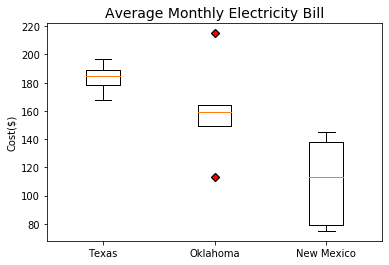

In [17]:
# Generate a box plot 
red_diamond = dict(markerfacecolor = "r", marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Cost($)")
ax1.boxplot(average_States, flierprops = red_diamond)
ax1.set_title("Average Monthly Electricity Bill", fontsize = 14)
ax1.set_xticklabels(states)
plt.show()

In [18]:
plt.savefig("Boxplot_avg_monthly_electricity.png")

<Figure size 432x288 with 0 Axes>